# Tutorial 

Let us consider chapter 7 of the excellent treatise on the subject of Exponential Smoothing By Hyndman and Athanasopoulos [1].
We will work through all the examples in the chapter as they unfold.

[1] [Hyndman, Rob J., and George Athanasopoulos. Forecasting: principles and practice. OTexts, 2014.](https://www.otexts.org/fpp/7)

# Exponential smoothing

First we load some data. We have included the R data in the notebook for expedience.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

data = [446.6565,  454.4733,  455.663 ,  423.6322,  456.2713,  440.5881, 425.3325,  485.1494,  506.0482,  526.792 ,  514.2689,  494.211 ]
index= pd.date_range(start='1996', end='2008', freq='A')
oildata = pd.Series(data, index)

data = [17.5534,  21.86  ,  23.8866,  26.9293,  26.8885,  28.8314, 30.0751,  30.9535,  30.1857,  31.5797,  32.5776,  33.4774, 39.0216,  41.3864,  41.5966]
index= pd.date_range(start='1990', end='2005', freq='A')
air = pd.Series(data, index)

data = [263.9177,  268.3072,  260.6626,  266.6394,  277.5158,  283.834 , 290.309 ,  292.4742,  300.8307,  309.2867,  318.3311,  329.3724, 338.884 ,  339.2441,  328.6006,  314.2554,  314.4597,  321.4138, 329.7893,  346.3852,  352.2979,  348.3705,  417.5629,  417.1236, 417.7495,  412.2339,  411.9468,  394.6971,  401.4993,  408.2705, 414.2428]
index= pd.date_range(start='1970', end='2001', freq='A')
livestock2 = pd.Series(data, index)

data = [407.9979 ,  403.4608,  413.8249,  428.105 ,  445.3387,  452.9942, 455.7402]
index= pd.date_range(start='2001', end='2008', freq='A')
livestock3 = pd.Series(data, index)

data = [41.7275,  24.0418,  32.3281,  37.3287,  46.2132,  29.3463, 36.4829,  42.9777,  48.9015,  31.1802,  37.7179,  40.4202, 51.2069,  31.8872,  40.9783,  43.7725,  55.5586,  33.8509, 42.0764,  45.6423,  59.7668,  35.1919,  44.3197,  47.9137]
index= pd.date_range(start='2005', end='2010-Q4', freq='QS-OCT')
aust = pd.Series(data, index)

## Simple Exponential Smoothing
Lets use Simple Exponential Smoothing to forecast the below oil data.

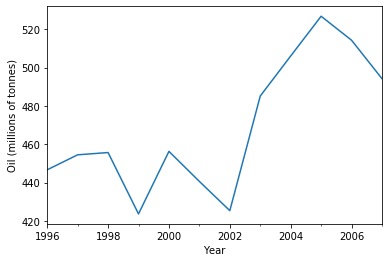

Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.


In [2]:
ax=oildata.plot()
ax.set_xlabel("Year")
ax.set_ylabel("Oil (millions of tonnes)")
plt.show()
print("Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.")

Here we run three variants of simple exponential smoothing:
1. In ```fit1``` we do not use the auto optimization but instead choose to explicitly provide the model with the $\alpha=0.2$ parameter
2. In ```fit2``` as above we choose an $\alpha=0.6$
3. In ```fit3``` we allow statsmodels to automatically find an optimized $\alpha$ value for us. This is the recommended approach.

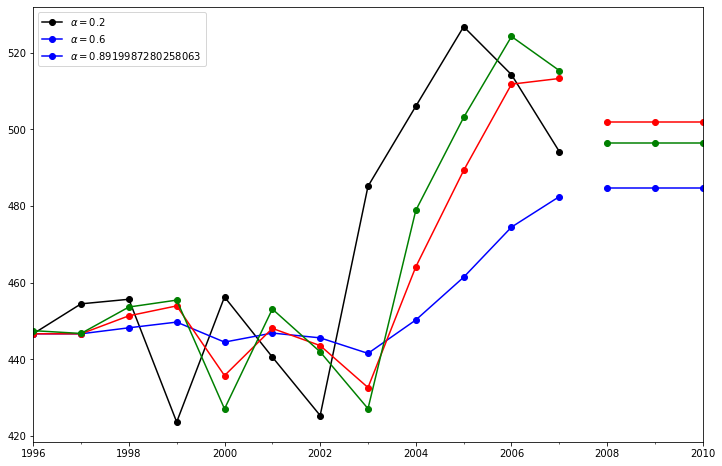

In [3]:
fit1 = SimpleExpSmoothing(oildata).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(3).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(oildata).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(3).rename(r'$\alpha=0.6$')
fit3 = SimpleExpSmoothing(oildata).fit()
fcast3 = fit3.forecast(3).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

ax = oildata.plot(marker='o', color='black', figsize=(12,8))
fcast1.plot(marker='o', ax=ax, color='blue', legend=True)
fit1.fittedvalues.plot(marker='o', ax=ax, color='blue')
fcast2.plot(marker='o', ax=ax, color='red', legend=True)

fit2.fittedvalues.plot(marker='o', ax=ax, color='red')
fcast3.plot(marker='o', ax=ax, color='green', legend=True)
fit3.fittedvalues.plot(marker='o', ax=ax, color='green')
plt.show()

## Holt's Method

Lets take a look at another example.
This time we use air pollution data and the Holt's Method.
We will fit three examples again.
1. In ```fit1``` we again choose not to use the optimizer and provide explicit values for $\alpha=0.8$ and $\beta=0.2$
2. In ```fit2``` we do the same as in ```fit1``` but choose to use an exponential model rather than a Holt's additive model.
3. In ```fit3``` we used a damped versions of the Holt's additive model but allow the dampening parameter $\phi$ to be optimized while fixing the values for $\alpha=0.8$ and $\beta=0.2$

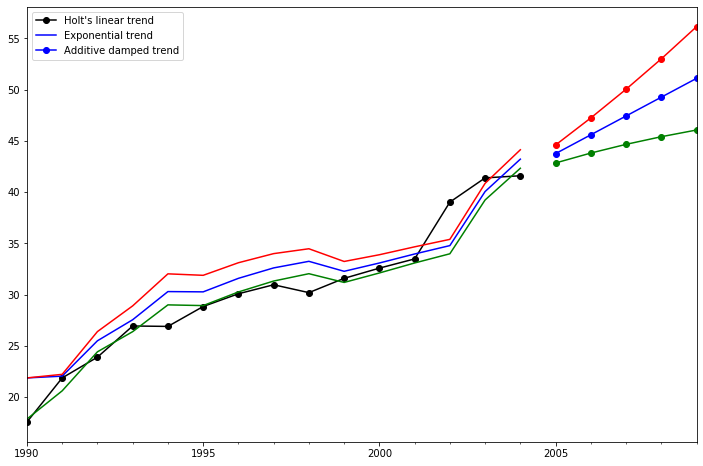

In [4]:
fit1 = Holt(air).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(5).rename("Holt's linear trend")
fit2 = Holt(air, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast2 = fit2.forecast(5).rename("Exponential trend")
fit3 = Holt(air, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(5).rename("Additive damped trend")

ax = air.plot(color="black", marker="o", figsize=(12,8))
fit1.fittedvalues.plot(ax=ax, color='blue')
fcast1.plot(ax=ax, color='blue', marker="o", legend=True)
fit2.fittedvalues.plot(ax=ax, color='red')
fcast2.plot(ax=ax, color='red', marker="o", legend=True)
fit3.fittedvalues.plot(ax=ax, color='green')
fcast3.plot(ax=ax, color='green', marker="o", legend=True)

plt.show()

### Seasonally adjusted data
Lets look at some seasonally adjusted livestock data. We fit five Holt's models.
The below table allows us to compare results when we use exponential versus additive and damped versus non-damped.
 
Note: ```fit4``` does not allow the parameter $\phi$ to be optimized by providing a fixed value of $\phi=0.98$

In [5]:
fit1 = SimpleExpSmoothing(livestock2).fit()
fit2 = Holt(livestock2).fit()
fit3 = Holt(livestock2,exponential=True).fit()
fit4 = Holt(livestock2,damped=True).fit(damping_slope=0.98)
fit5 = Holt(livestock2,exponential=True,damped=True).fit()
params = ['smoothing_level', 'smoothing_slope', 'damping_slope', 'initial_level', 'initial_slope']
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$l_0$","$b_0$","SSE"] ,columns=['SES', "Holt's","Exponential", "Additive", "Multiplicative"])
results["SES"] =            [fit1.params[p] for p in params] + [fit1.sse]
results["Holt's"] =         [fit2.params[p] for p in params] + [fit2.sse]
results["Exponential"] =    [fit3.params[p] for p in params] + [fit3.sse]
results["Additive"] =       [fit4.params[p] for p in params] + [fit4.sse]
results["Multiplicative"] = [fit5.params[p] for p in params] + [fit5.sse]
results

SES       Holt's  Exponential     Additive  Multiplicative
$\alpha$     1.000000     0.974306     0.977634     0.978826        0.974909
$\beta$           NaN     0.000000     0.000000     0.000000        0.000000
$\phi$            NaN          NaN          NaN     0.980000        0.981647
$l_0$      263.918414   258.882566   260.341674   257.355204      258.951884
$b_0$             NaN     5.010780     1.013780     6.644295        1.038144
SSE       6761.350218  6004.138200  6104.194747  6036.555016     6081.995045

### Plots of Seasonally Adjusted Data
The following plots allow us to evaluate the level and slope/trend components of the above table's fits.

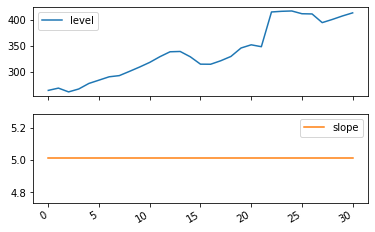

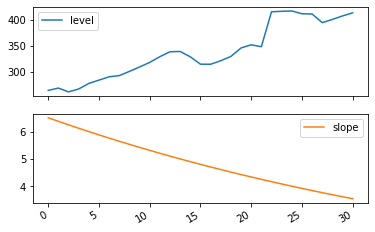

Figure 7.4: Level and slope components for Holt’s linear trend method and the additive damped trend method.


In [6]:
for fit in [fit2,fit4]:
    pd.DataFrame(np.c_[fit.level,fit.slope]).rename(
        columns={0:'level',1:'slope'}).plot(subplots=True)
plt.show()
print('Figure 7.4: Level and slope components for Holt’s linear trend method and the additive damped trend method.')

## Comparison
Here we plot a comparison Simple Exponential Smoothing and Holt's Methods for various additive, exponential and damped combinations. All of the models parameters will be optimized by statsmodels.

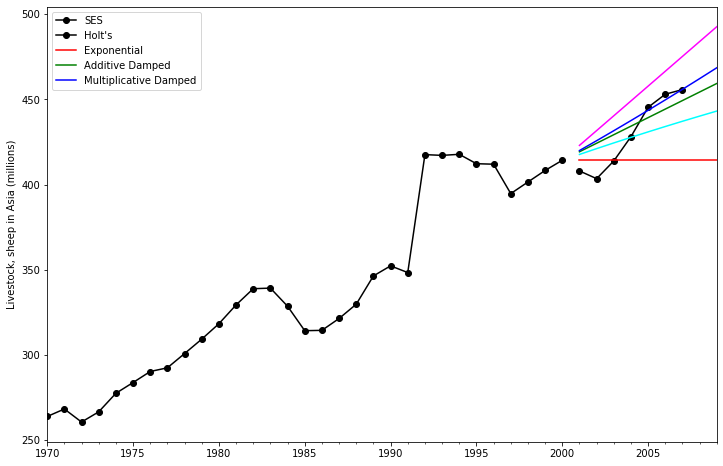

Figure 7.5: Forecasting livestock, sheep in Asia: comparing forecasting performance of non-seasonal methods.


In [7]:
fit1 = SimpleExpSmoothing(livestock2).fit()
fcast1 = fit1.forecast(9).rename("SES")
fit2 = Holt(livestock2).fit()
fcast2 = fit2.forecast(9).rename("Holt's")
fit3 = Holt(livestock2, exponential=True).fit()
fcast3 = fit3.forecast(9).rename("Exponential")
fit4 = Holt(livestock2, damped=True).fit(damping_slope=0.98)
fcast4 = fit4.forecast(9).rename("Additive Damped")
fit5 = Holt(livestock2, exponential=True, damped=True).fit()
fcast5 = fit5.forecast(9).rename("Multiplicative Damped")

ax = livestock2.plot(color="black", marker="o", figsize=(12,8))
livestock3.plot(ax=ax, color="black", marker="o", legend=False)
fcast1.plot(ax=ax, color='red', legend=True)
fcast2.plot(ax=ax, color='green', legend=True)
fcast3.plot(ax=ax, color='blue', legend=True)
fcast4.plot(ax=ax, color='cyan', legend=True)
fcast5.plot(ax=ax, color='magenta', legend=True)
ax.set_ylabel('Livestock, sheep in Asia (millions)')
plt.show()
print('Figure 7.5: Forecasting livestock, sheep in Asia: comparing forecasting performance of non-seasonal methods.')

## Holt's Winters Seasonal
Finally we are able to run full Holt's Winters Seasonal Exponential Smoothing  including a trend component and a seasonal component.
statsmodels allows for all the combinations including as shown in the examples below:
1. ```fit1``` additive trend, additive seasonal of period ```season_length=4``` and the use of a Box-Cox transformation.
1. ```fit2``` additive trend, multiplicative seasonal of period ```season_length=4``` and the use of a Box-Cox transformation..
1. ```fit3``` additive damped trend, additive seasonal of period ```season_length=4``` and the use of a Box-Cox transformation.
1. ```fit4``` additive damped trend, multiplicative seasonal of period ```season_length=4``` and the use of a Box-Cox transformation.

The plot shows the results and forecast for ```fit1``` and ```fit2```.
The table allows us to compare the results and parameterizations.

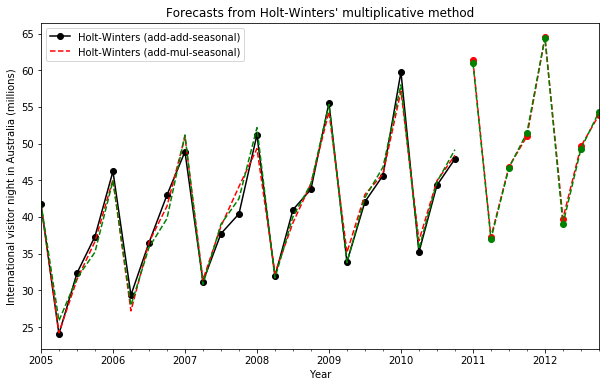

Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.


Additive  Multiplicative  Additive Dam  Multiplica Dam
$\alpha$  4.546625e-01    3.659925e-01  6.788341e-09        0.000178
$\beta$   1.554872e-08    1.832850e-20  4.846709e-72        0.000178
$\phi$             NaN             NaN  9.431105e-01        0.913344
$\gamma$  5.243651e-01    2.657584e-14  1.084804e-06        0.000000
$l_0$     1.421756e+01    1.454805e+01  1.415717e+01       14.535054
$b_0$     1.307577e-01    1.661245e-01  2.455367e-01        0.483855
SSE       5.001711e+01    4.307070e+01  3.527454e+01       39.683104

In [8]:
fit1 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='mul').fit(use_boxcox=True)
fit3 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
fit4 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$",r"$l_0$","$b_0$","SSE"])
params = ['smoothing_level', 'smoothing_slope', 'damping_slope', 'smoothing_seasonal', 'initial_level', 'initial_slope']
results["Additive"]       = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Additive Dam"]   = [fit3.params[p] for p in params] + [fit3.sse]
results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]

ax = aust.plot(figsize=(10,6), marker='o', color='black', title="Forecasts from Holt-Winters' multiplicative method" )
ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")
fit1.fittedvalues.plot(ax=ax, style='--', color='red')
fit2.fittedvalues.plot(ax=ax, style='--', color='green')

fit1.forecast(8).rename('Holt-Winters (add-add-seasonal)').plot(ax=ax, style='--', marker='o', color='red', legend=True)
fit2.forecast(8).rename('Holt-Winters (add-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='green', legend=True)

plt.show()
print("Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.")

results

### The Internals
It is possible to get at the internals of the Exponential Smoothing models. 

Here we show some tables that allow you to view side by side the original values $y_t$, the level $l_t$, the trend $b_t$, the season $s_t$ and the fitted values $\hat{y}_t$.

In [9]:
df = pd.DataFrame(np.c_[aust, fit1.level, fit1.slope, fit1.season, fit1.fittedvalues],
                  columns=[r'$y_t$',r'$l_t$',r'$b_t$',r'$s_t$',r'$\hat{y}_t$'],index=aust.index)
df.append(fit1.forecast(8).rename(r'$\hat{y}_t$').to_frame(), sort=True)

$\hat{y}_t$      $b_t$      $l_t$      $s_t$    $y_t$
2005-01-01    41.721337 -34.969414  49.317727  -7.593377  41.7275
2005-04-01    24.190470 -35.452633  49.932262 -25.834409  24.0418
2005-07-01    31.460236 -36.532756  51.126063 -19.182957  32.3281
2005-10-01    36.634461 -37.397662  52.210086 -15.209802  37.3287
2006-01-01    45.097507 -38.467277  53.476761  -7.837296  46.2132
2006-04-01    27.191826 -40.276269  55.513789 -27.017168  29.3463
2006-07-01    36.544154 -40.624935  56.224337 -19.713750  36.4829
2006-10-01    41.449262 -42.041730  57.766008 -15.523276  42.9777
2007-01-01    50.934293 -41.543660  57.536556  -7.588681  48.9015
2007-04-01    31.418021 -42.197715  58.150830 -26.874205  31.1802
2007-07-01    38.718199 -42.303272  58.362734 -20.191765  37.7179
2007-10-01    44.140343 -41.085460  57.181495 -14.982714  40.4202
2008-01-01    49.315503 -42.961297  58.852717  -8.619651  51.2069
2008-04-01    32.306830 -43.186295  59.366679 -27.308953  31.8872
2008-07-01    39.207327 -44.826795  61.095332 -20.925281  40.9783
2008-10-01    44.551315 -44.899087  61.461719 -17.319471  43.7725
2009-01-01    54.357802 -46.191949  62.816449  -7.881371  55.5586
2009-04-01    35.153724 -45.979774  62.831666 -28.447513  33.8509
2009-07-01    43.066191 -46.227727  63.082162 -20.550345  42.0764
2009-10-01    45.871061 -46.852049  63.748292 -17.997316  45.6423
2010-01-01    57.166318 -48.770078  65.777152  -7.371755  59.7668
2010-04-01    36.761359 -48.307801  65.649392 -29.816303  35.1919
2010-07-01    44.932303 -48.798105  66.118764 -21.516929  44.3197
2010-10-01    48.399392 -49.269222  66.666696 -18.521670  47.9137
2011-01-01    61.337554        NaN        NaN        NaN      NaN
2011-04-01    37.242648        NaN        NaN        NaN      NaN
2011-07-01    46.842316        NaN        NaN        NaN      NaN
2011-10-01    51.004726        NaN        NaN        NaN      NaN
2012-01-01    64.469960        NaN        NaN        NaN      NaN
2012-04-01    39.776334        NaN        NaN        NaN      NaN
2012-07-01    49.635147        NaN        NaN        NaN      NaN
2012-10-01    53.900518        NaN        NaN        NaN      NaN

In [10]:
df = pd.DataFrame(np.c_[aust, fit2.level, fit2.slope, fit2.season, fit2.fittedvalues], 
                  columns=[r'$y_t$',r'$l_t$',r'$b_t$',r'$s_t$',r'$\hat{y}_t$'],index=aust.index)
df.append(fit2.forecast(8).rename(r'$\hat{y}_t$').to_frame(), sort=True)

$\hat{y}_t$      $b_t$      $l_t$     $s_t$    $y_t$
2005-01-01    41.859612 -36.529888  51.244066  0.815909  41.7275
2005-04-01    25.838333 -35.866348  50.735677  0.495384  24.0418
2005-07-01    31.658927 -37.283715  52.060097  0.613000  32.3281
2005-10-01    35.189404 -39.169205  54.186896  0.664196  37.3287
2006-01-01    44.929187 -40.306067  55.705776  0.815068  46.2132
2006-04-01    27.933714 -42.087659  57.756237  0.493064  29.3463
2006-07-01    35.824584 -43.100523  59.127093  0.610106  36.4829
2006-10-01    39.768835 -45.644351  61.907203  0.661720  42.9777
2007-01-01    51.175036 -45.121187  61.856066  0.813610  48.9015
2007-04-01    30.814546 -46.408595  63.134875  0.490309  31.1802
2007-07-01    39.009285 -46.386458  63.326857  0.608239  37.7179
2007-10-01    42.485965 -46.170642  63.143023  0.660457  40.4202
2008-01-01    52.174108 -46.759250  63.701007  0.813403  51.2069
2008-04-01    31.677199 -47.835625  64.870215  0.489565  31.8872
2008-07-01    40.035687 -49.239416  66.467398  0.607689  40.9783
2008-10-01    44.515949 -49.575124  67.064869  0.659596  43.7725
2009-01-01    55.343449 -50.602235  68.189200  0.812785  55.5586
2009-04-01    33.773122 -51.515326  69.284231  0.487890  33.8509
2009-07-01    42.644252 -52.025336  69.970197  0.606388  42.0764
2009-10-01    46.778369 -52.310612  70.365088  0.658708  45.6423
2010-01-01    58.009128 -54.093876  72.211242  0.812307  59.7668
2010-04-01    35.648414 -54.499832  72.909217  0.486530  35.1919
2010-07-01    44.784337 -55.163735  73.682681  0.605414  44.3197
2010-10-01    49.174394 -55.389377  74.029205  0.657839  47.9137
2011-01-01    60.967448        NaN        NaN       NaN      NaN
2011-04-01    36.993757        NaN        NaN       NaN      NaN
2011-07-01    46.712314        NaN        NaN       NaN      NaN
2011-10-01    51.482619        NaN        NaN       NaN      NaN
2012-01-01    64.456291        NaN        NaN       NaN      NaN
2012-04-01    39.017141        NaN        NaN       NaN      NaN
2012-07-01    49.291639        NaN        NaN       NaN      NaN
2012-10-01    54.319914        NaN        NaN       NaN      NaN

Finally lets look at the levels, slopes/trends and seasonal components of the models.

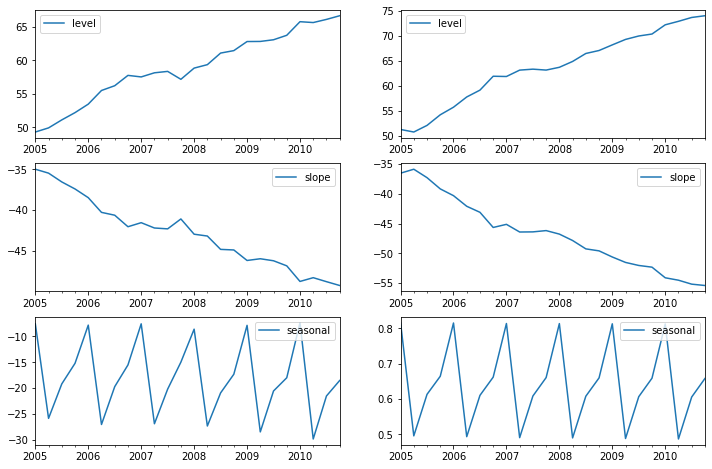

In [11]:
states1 = pd.DataFrame(np.c_[fit1.level, fit1.slope, fit1.season], columns=['level','slope','seasonal'], index=aust.index)
states2 = pd.DataFrame(np.c_[fit2.level, fit2.slope, fit2.season], columns=['level','slope','seasonal'], index=aust.index)
fig, [[ax1, ax4],[ax2, ax5], [ax3, ax6]] = plt.subplots(3, 2, figsize=(12,8))
states1[['level']].plot(ax=ax1)
states1[['slope']].plot(ax=ax2)
states1[['seasonal']].plot(ax=ax3)
states2[['level']].plot(ax=ax4)
states2[['slope']].plot(ax=ax5)
states2[['seasonal']].plot(ax=ax6)
plt.show()